In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt 
import soundfile as sf
import scipy.signal as ss


ModuleNotFoundError: No module named 'numpy'

In [2]:
#hlavni inicializace
klavir, Fs = sf.read("klavir.wav")

#pro 26 - 36.71 = 1/36.71 = 0.02724053
#pro 51 - 155.56 = 1/155.56
#pro 104 - 3322.44 = 1/3322.44
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
xall = np.zeros((MIDITO+1, N)) # matrix with all tones - first signals empty,
# but we have plenty of memory ...
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = klavir[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...
    xall[tone,:] = x
    samplefrom += Nwholetone
    sampleto += Nwholetone

perioda1 = int(0.02724053*Fs*3)
perioda2 = int(0.00642839*Fs*3)
perioda3 = int(0.00030098*Fs*3)
start1 = xall[26]#int(26-MIDIFROM) #2
start2 = xall[51]#(51-MIDIFROM) #25
start3 = xall[104]#(104-MIDIFROM) #80
second = np.arange(0, 0.1, 1/Fs)

Text(0.5, 0, 'Frekvence [Hz]')

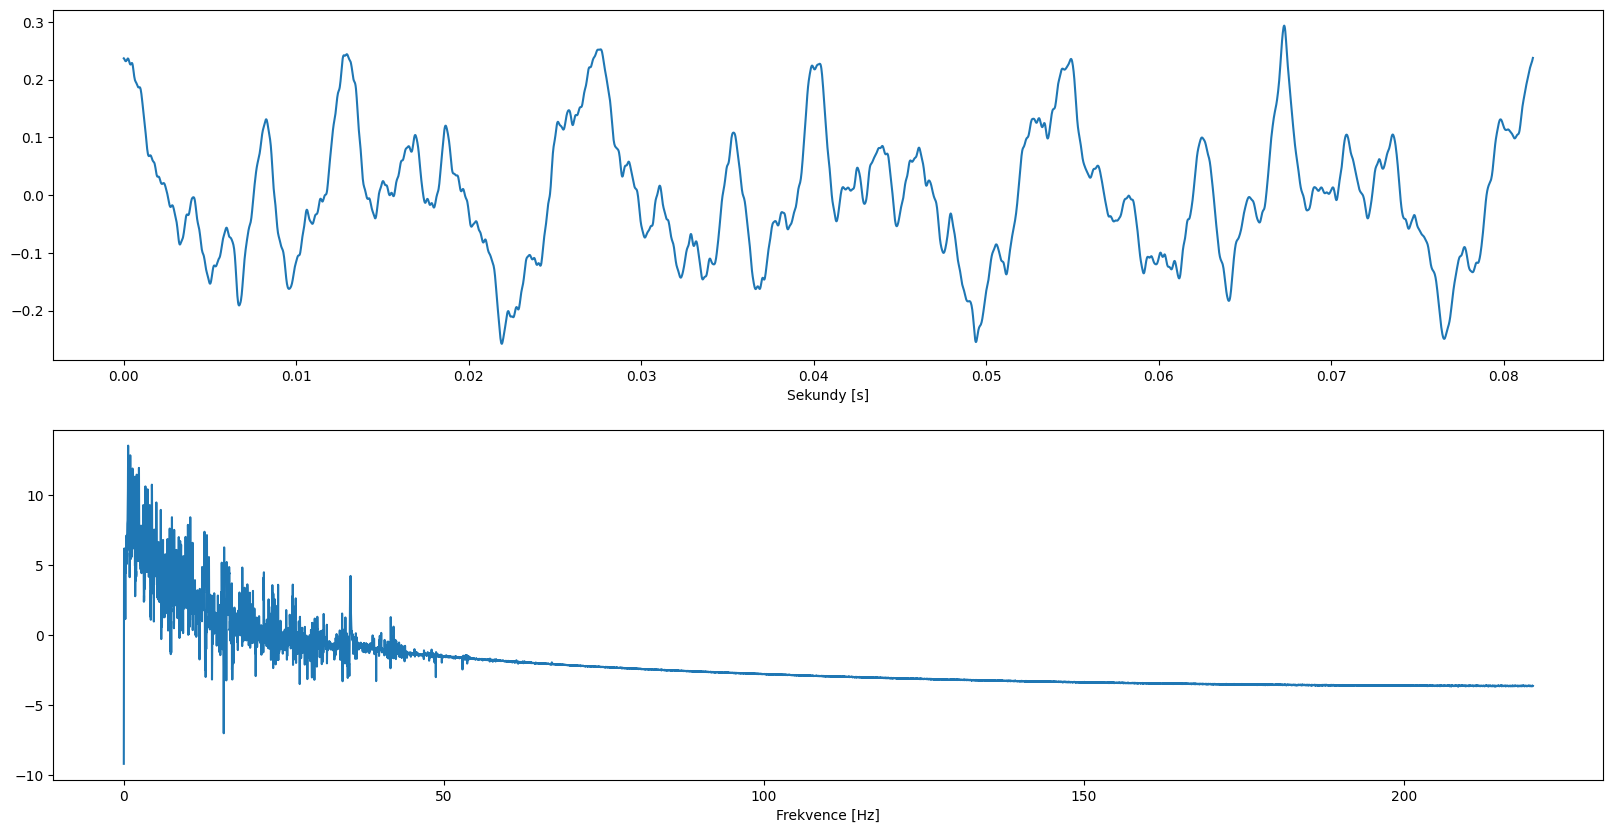

In [3]:
#ukol 4.1.1
_, tony = plt.subplots(2,1,figsize=(20, 10))
tony[0].plot(second[:3922], start1[:perioda1])
tony[0].set_xlabel("Sekundy [s]")
FFT = np.fft.fft(start1)
log = np.log(10e-5+np.abs(FFT)**2)
moduleHalf = log[:log.size // 2]
F = np.arange(moduleHalf.size)*(Fs /xall.size)
sf.write("../a_orig.wav", xall[26], Fs)
tony[1].plot(F, moduleHalf)
tony[1].set_xlabel("Frekvence [Hz]")

Text(0.5, 0, 'Frekvence [Hz]')

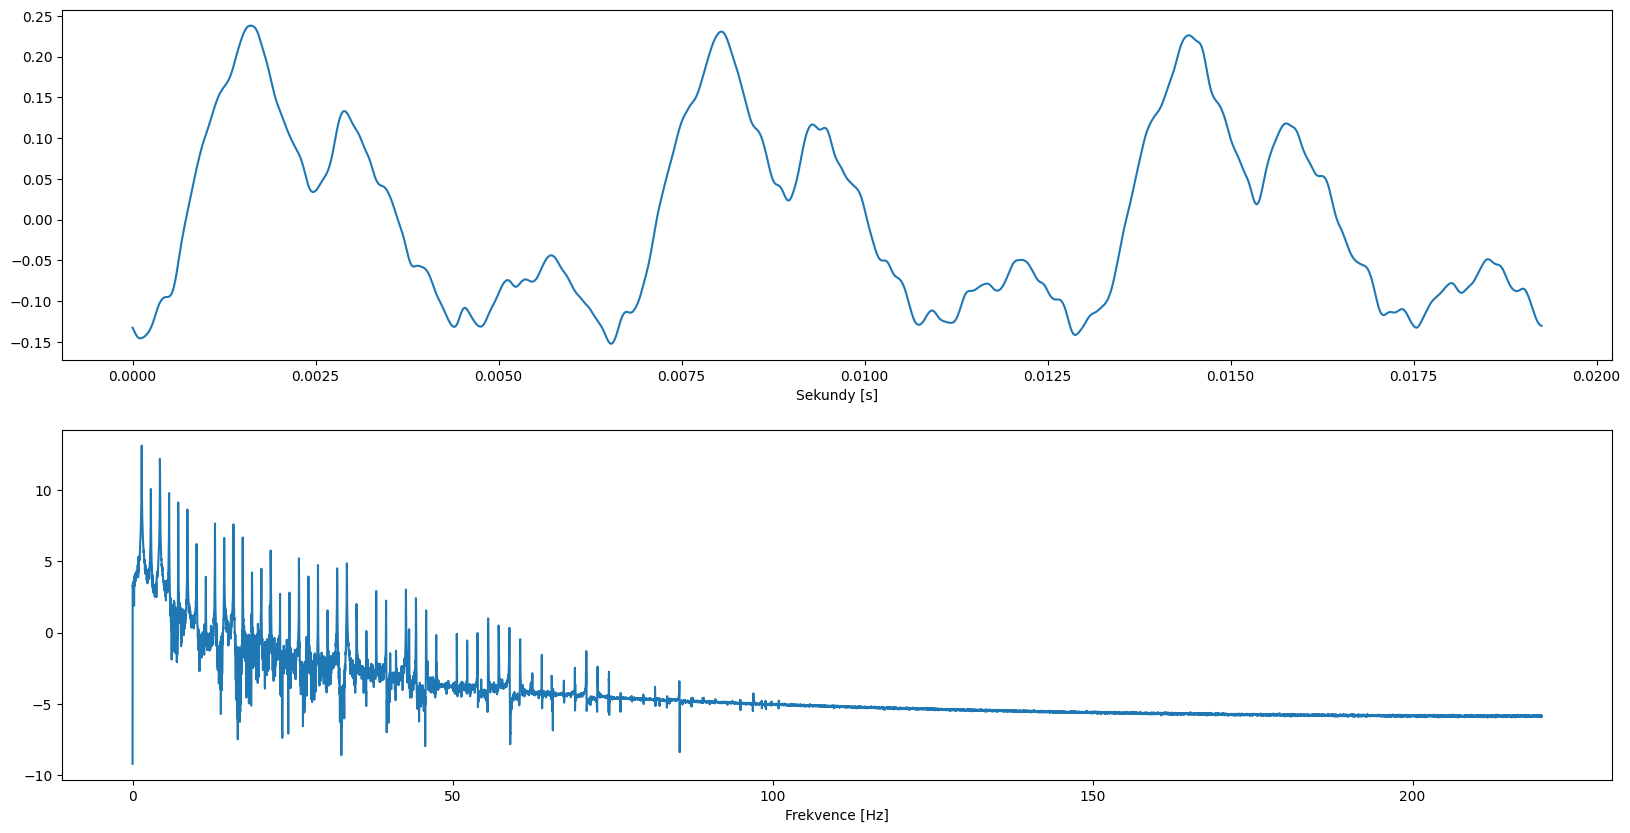

In [4]:
#ukol 4.1.2
_, tony = plt.subplots(2,1,figsize=(20, 10))
tony[0].plot(second[:925],start2[:perioda2])
tony[0].set_xlabel("Sekundy [s]")
FFT2 = np.fft.fft(start2)
log2 = np.log(10e-5+np.abs(FFT2)**2)
moduleHalf2 = log2[:log2.size // 2]
F2 = np.arange(moduleHalf2.size)*(Fs /xall.size)
sf.write("../b_orig.wav", xall[51], Fs)
tony[1].plot(F2, moduleHalf2)
tony[1].set_xlabel("Frekvence [Hz]")

Text(0.5, 0, 'Frekvence [Hz]')

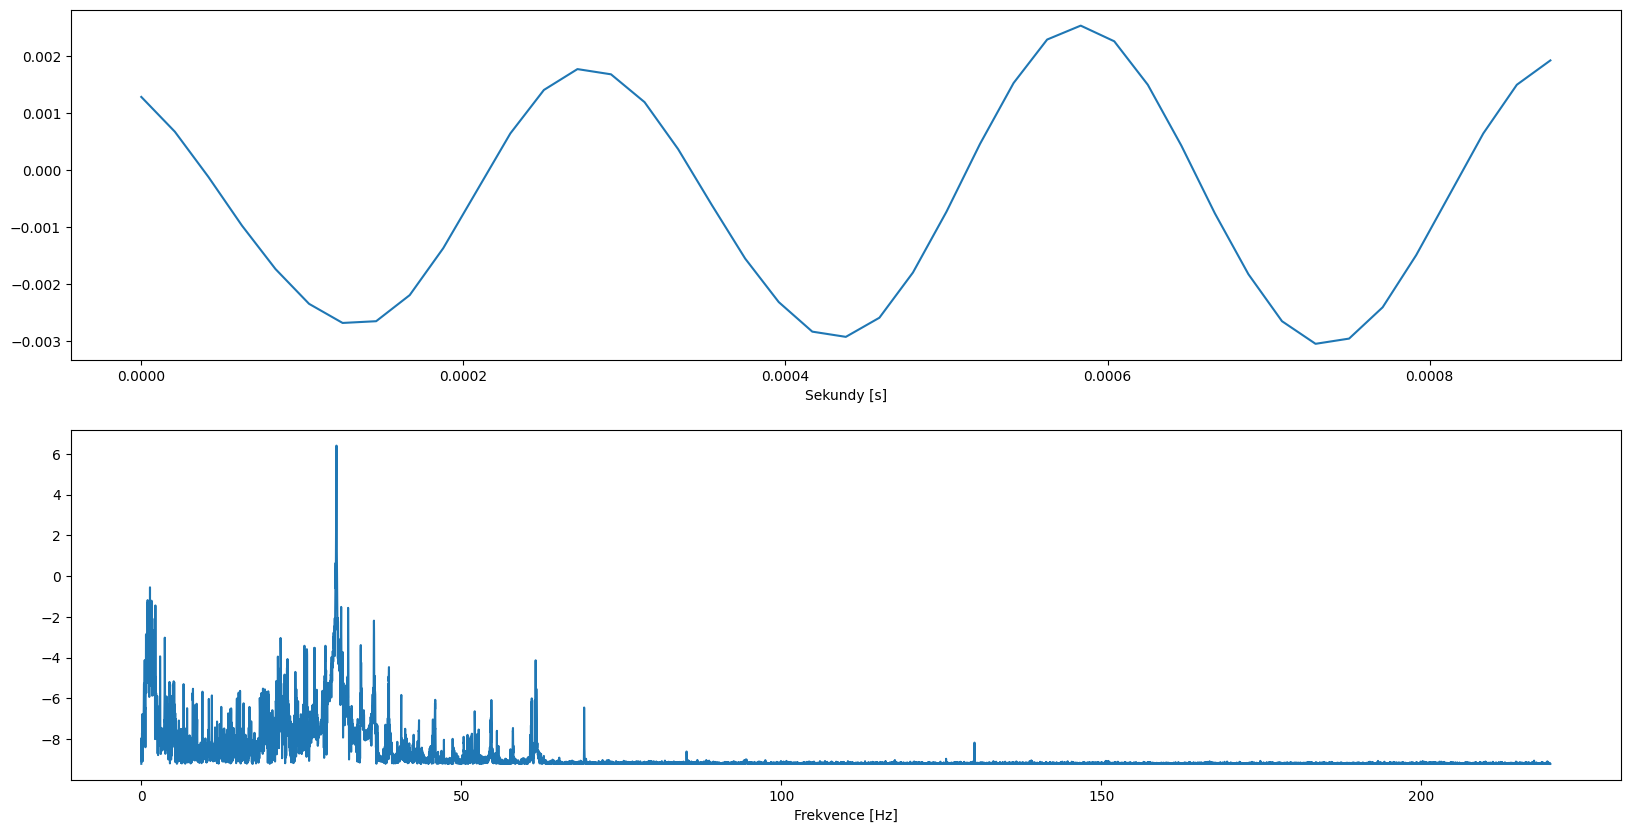

In [5]:
#ukol 4.1.3
_, tony = plt.subplots(2,1,figsize=(20, 10))
tony[0].plot(second[:43],start3[:perioda3])
tony[0].set_xlabel("Sekundy [s]")
FFT3 = np.fft.fft(start3)
log3 = np.log(10e-5+np.abs(FFT3)**2)
moduleHalf3 = log3[:log3.size // 2]
F3 = np.arange(moduleHalf3.size)*(Fs /xall.size)
sf.write("../c_orig.wav", xall[104], Fs)
tony[1].plot(F3, moduleHalf3)
tony[1].set_xlabel("Frekvence [Hz]")

In [6]:
#ukol 4.2. zakladni frekvence vsech tonu
for i in np.arange(24,109):
    vypocetCorrelate = (ss.correlate(xall[i],xall[i],"full"))
    velikost = int(vypocetCorrelate.size//2)
    korelace = vypocetCorrelate[velikost:]
    vrcholky = ss.find_peaks(korelace, height=0.0001)
    maxVrch = vrcholky[1]['peak_heights']
    hodnota = np.argmax(maxVrch)
    odpoved = vrcholky[0][hodnota]
    pomocna = (1/odpoved)*Fs
    print(i, pomocna)
    #nektere hodnoty byly pozmeneny, z duvodu ze autokorelace muze delat problemy u vyssich frekvenci

24 32.80929596719071
25 34.757422157856624
26 36.83806600153492
27 39.02439024390244
28 41.343669250645995
29 43.7956204379562
30 46.42166344294004
31 49.18032786885246
32 52.11726384364821
33 55.172413793103445
34 58.465286236297196
35 61.935483870967744
36 65.57377049180327
37 69.46454413892909
38 73.61963190184049
39 77.92207792207793
40 82.61617900172118
41 87.75137111517367
42 92.84332688588007
43 98.36065573770492
44 104.34782608695652
45 110.59907834101382
46 117.07317073170732
47 123.71134020618557
48 131.14754098360655
49 138.72832369942196
50 147.23926380368098
51 155.84415584415586
52 164.94845360824743
53 175.1824817518248
54 185.32818532818533
55 196.72131147540983
56 207.7922077922078
57 220.1834862385321
58 234.14634146341464
59 247.42268041237114
60 262.2950819672131
61 277.4566473988439
62 294.47852760736197
63 311.6883116883117
64 328.7671232876712
65 350.3649635036496
66 369.2307692307692
67 393.44262295081967
68 417.39130434782606
69 440.3669724770642
70 466.0194174

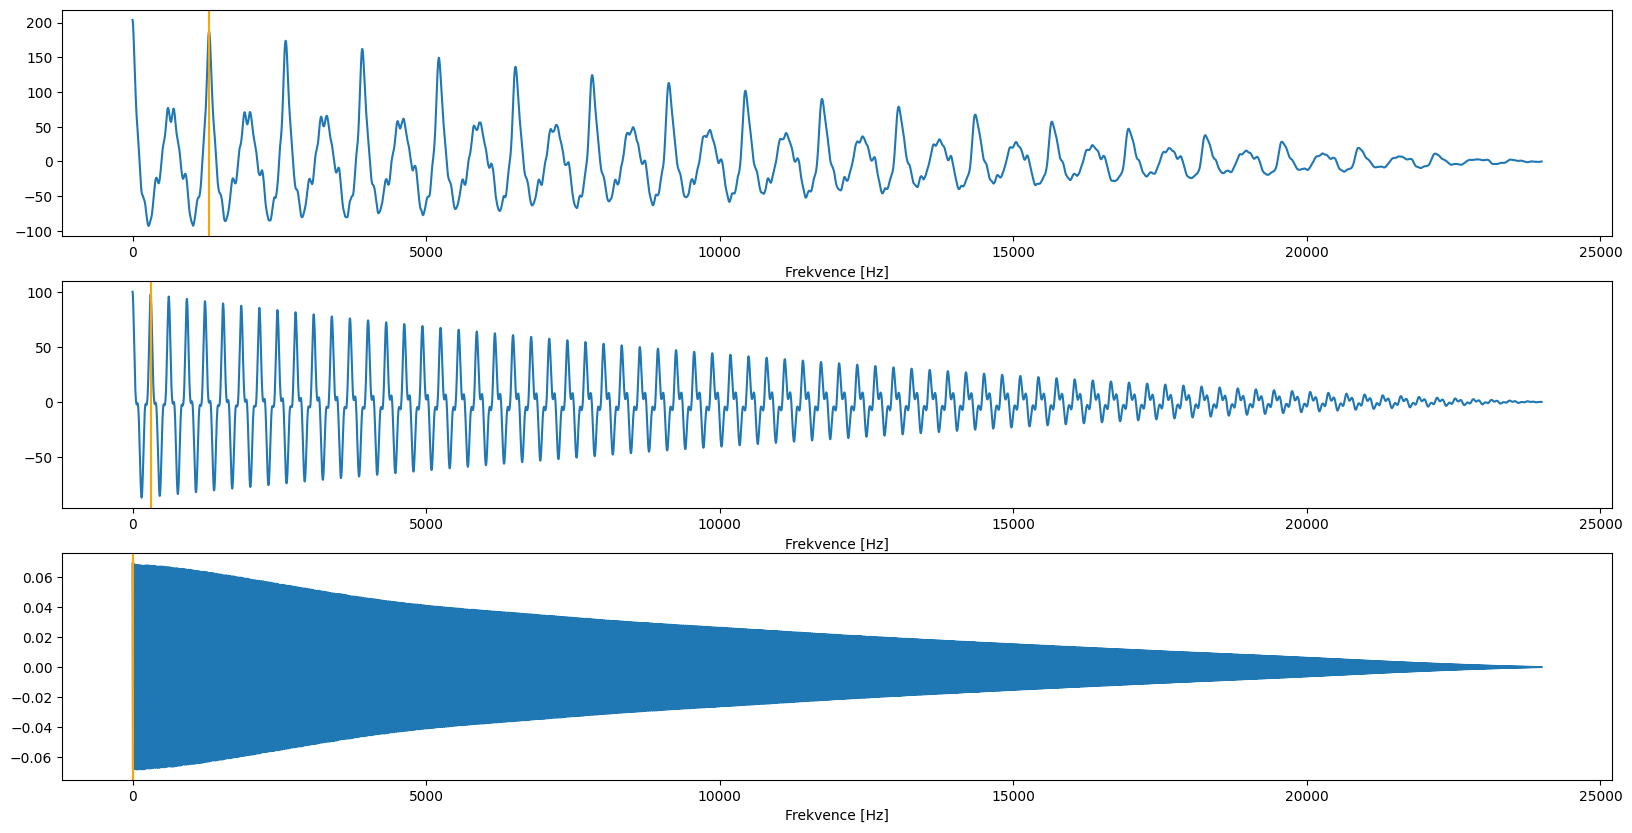

In [7]:
#ukol 4.2 zobrazeni grafu
_, tony = plt.subplots(3,1,figsize=(20, 10))
correlate0 = ss.correlate(xall[26],xall[26],"full")
correlate = correlate0[int(correlate0.size//2):]
tony[0].plot(correlate)
tony[0].set_xlabel("Frekvence [Hz]")
tony[0].axvline(x=1303, ls='-', color="orange")

correlate02 = ss.correlate(xall[51],xall[51],"full")
correlate2 = correlate02[int(correlate02.size//2):]
tony[1].plot(correlate2)
tony[1].set_xlabel("Frekvence [Hz]")
tony[1].axvline(x=308, ls='-', color="orange")

correlate03 = ss.correlate(xall[104],xall[104],"full")
correlate3 = correlate03[int(correlate03.size//2):]
tony[2].plot(correlate3)
tony[2].set_xlabel("Frekvence [Hz]")
tony[2].axvline(x=14, ls='-', color="orange")

In [8]:
#ukol 4.3 zpresneni odhadu
# >>>>>>>>>>>>>>>>> #dtft <<<<<<<<<<<<<<<<<<<<<<<<<
for i in np.arange(24,109):
    vypocetCorrelate = (ss.correlate(xall[i],xall[i],"full"))
    velikost = int(vypocetCorrelate.size//2)
    korelace = vypocetCorrelate[velikost:]

    vrcholky = ss.find_peaks(korelace, height=0.0001)
    maxVrch = vrcholky[1]['peak_heights']
    hodnota = np.argmax(maxVrch)

    odpoved = vrcholky[0][hodnota]
    pomocna = ((1/odpoved)*Fs)

    FREQRANGE = 10
    FREQPOINTS = 500
    n = np.arange(0, N)

    # finding the max and showing where we'll compute ... 
    fsweep = np.linspace(pomocna-FREQRANGE, pomocna+FREQRANGE,FREQPOINTS)

    # do the DTFT 
    A = np.zeros([FREQPOINTS, N],dtype=complex)   
    for k in np.arange(0,FREQPOINTS):
        A[k,:] = np.exp(-2j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs ... 
    Xdtft = np.matmul(A,xall[i].T)
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    #i je ton, pomocna je vypocitane pomoci korelace, precisefmax je pomoci korelace a pote dtft
    print(i, pomocna, precisefmax)

24 32.80929596719071 32.66901540606846
25 34.757422157856624 34.61714159673438
26 36.83806600153492 36.69778544041267
27 39.02439024390244 38.88410968278019
28 41.343669250645995 41.16330852920311
29 43.7956204379562 43.615259716513314
30 46.42166344294004 46.24130272149715
31 49.18032786885246 48.95988698708893
32 52.11726384364821 51.85674280156404
33 55.172413793103445 54.951972911339915
34 58.465286236297196 58.24484535453367
35 61.935483870967744 61.63488266856294
36 65.57377049180327 65.31324944971911
37 69.46454413892909 69.20402309684492
38 73.61963190184049 73.43927118039761
39 77.92207792207793 77.82187752127632
40 82.61617900172118 82.4358182802783
41 87.75137111517367 87.33052943180694
42 92.84332688588007 92.54272568347527
43 98.36065573770492 98.01997437497947
44 104.34782608695652 103.88690424326914
45 110.59907834101382 110.01791601636452
46 117.07317073170732 116.5721687276993
47 123.71134020618557 123.17025804185691
48 131.14754098360655 130.44613817799532
49 138.7283

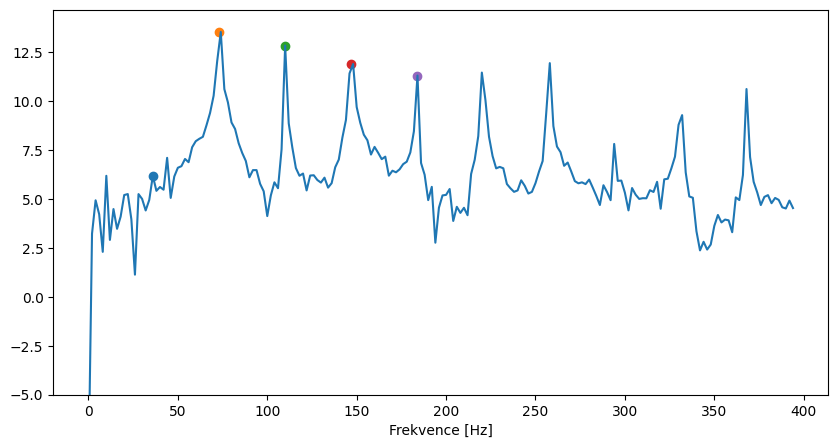

In [9]:
#ukol 4.4 pro 26
# >>>>>>>>>>>>>>>>> #dtft <<<<<<<<<<<<<<<<<<<<<<<<<
X = np.fft.fft(xall[26])
FREQRANGE = 10
FREQPOINTS = 200
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs

# finding the max and showing where we'll compute ... 
fmax = f[np.argmax(Xmag)]
Xmax = np.max(Xmag)
ffrom = fmax-FREQRANGE
fto = fmax+FREQRANGE
fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

modul1 = np.abs(X[int(precisefmax)])
faze1 = np.angle(X[int(precisefmax)])

# do the DTFT 
A = np.zeros([FREQPOINTS, N],dtype=complex)   
for k in np.arange(0,FREQPOINTS):
    A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs ... 
Xdtft = np.matmul(A,xall[26].T)
precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
precisefmax = precisefmax//2
prechodna = fmax

preciseXmag = np.zeros(Xmag.size) 

for i in np.arange(0, int(11*precisefmax//2)):
  preciseXmag[i] = np.log(10e-5+Xmag[i]**2)

plt.figure(figsize=(10,5))
plt.plot(f[:int(11*precisefmax//2)],preciseXmag[:int(11*precisefmax//2)])
plt.ylim(ymin = -5) 

for i in np.arange(1,6):
    fmax = prechodna * i
      
    ffrom = fmax-FREQRANGE
    fto = fmax+FREQRANGE
    fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

    # do the DTFT 
    A = np.zeros([FREQPOINTS, N],dtype=complex)   
    for k in np.arange(0,FREQPOINTS):
      A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
    Xdtft = np.matmul(A,xall[26].T)
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    precisefmax = precisefmax//2

    modul1 = np.abs(X[int(precisefmax)])
    faze1 = np.angle(X[int(precisefmax)])
    ymax = np.max(preciseXmag[int((precisefmax/2) - 2) : int((precisefmax/2) + 2)])
    #-2 a +2 magicka konstanta 
    plt.xlabel("Frekvence [Hz]")
    plt.scatter(precisefmax,ymax)

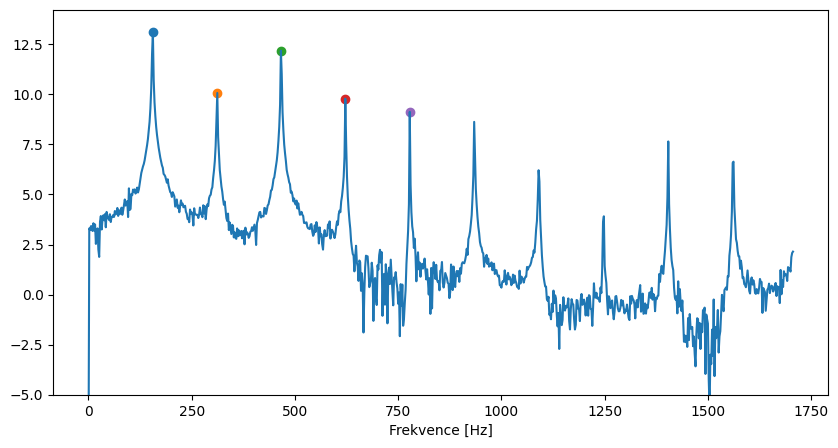

In [10]:
#ukol 4.4 pro 51
# >>>>>>>>>>>>>>>>> #dtft <<<<<<<<<<<<<<<<<<<<<<<<<
X = np.fft.fft(xall[51])
FREQRANGE = 10
FREQPOINTS = 200
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs

# finding the max and showing where we'll compute ... 
fmax = f[np.argmax(Xmag)]
Xmax = np.max(Xmag)
ffrom = fmax-FREQRANGE
fto = fmax+FREQRANGE
fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

modul2 = np.abs(X[int(precisefmax)])
faze2 = np.angle(X[int(precisefmax)])

# do the DTFT 
A = np.zeros([FREQPOINTS, N],dtype=complex)   
for k in np.arange(0,FREQPOINTS):
    A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
Xdtft = np.matmul(A,xall[51].T)
precisefmax = fsweep[np.argmax(np.abs(Xdtft))]

prechodna = fmax

preciseXmag = np.zeros(Xmag.size) 

for i in np.arange(0, int(11*precisefmax//2)):
  preciseXmag[i] = np.log(10e-5+Xmag[i]**2)

plt.figure(figsize=(10,5))
plt.plot(f[:int(11*precisefmax//2)], preciseXmag[:int(11*precisefmax//2)])
plt.ylim(ymin = -5) 

for i in np.arange(1,6):
    fmax = prechodna * i
    rotate = 0
      
    ffrom = fmax-FREQRANGE
    fto = fmax+FREQRANGE
    fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

    # do the DTFT 
    A = np.zeros([FREQPOINTS, N],dtype=complex)   
    for k in np.arange(0,FREQPOINTS):
      A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)    
    Xdtft = np.matmul(A,xall[51].T)
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]

    modul2 = np.abs(X[int(precisefmax)])
    faze2 = np.angle(X[int(precisefmax)])
    ymax = np.max(preciseXmag[int((precisefmax/2) - 2) : int((precisefmax/2) + 2)])
    plt.xlabel("Frekvence [Hz]")
    plt.scatter(precisefmax,ymax)

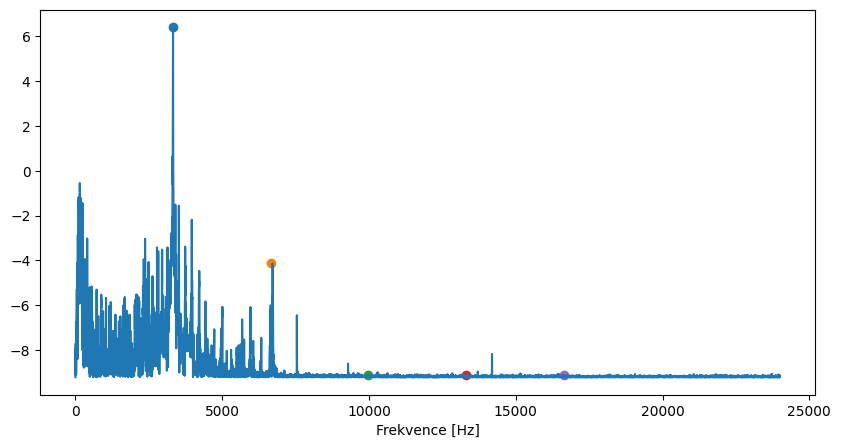

In [11]:
#ukol 4.4 pro 104
# >>>>>>>>>>>>>>>>> #dtft <<<<<<<<<<<<<<<<<<<<<<<<<
X = np.fft.fft(xall[104])
FREQRANGE = 10
FREQPOINTS = 200
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs

# finding the max and showing where we'll compute ... 
fmax = f[np.argmax(Xmag)]
Xmax = np.max(Xmag)
ffrom = fmax-FREQRANGE
fto = fmax+FREQRANGE
fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

modul3 = np.abs(X[int(precisefmax)])
faze3 = np.angle(X[int(precisefmax)])

# do the DTFT 
A = np.zeros([FREQPOINTS, N],dtype=complex)   
for k in np.arange(0,FREQPOINTS):
    A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
Xdtft = np.matmul(A,xall[104].T)
precisefmax = fsweep[np.argmax(np.abs(Xdtft))]

prechodna = fmax

preciseXmag = np.zeros(Xmag.size) 

for i in np.arange(0, int(11*precisefmax//2)):
  if i > 12000:
    i = 12000 - i
  preciseXmag[i] = np.log(10e-5+Xmag[i]**2)

plt.figure(figsize=(10,5))
plt.plot(f[:int(11*precisefmax//2)], preciseXmag[:int(11*precisefmax//2)])

for i in np.arange(1,6):
    fmax = prechodna * i
    rotate = 0
      
    ffrom = fmax-FREQRANGE
    fto = fmax+FREQRANGE
 
    fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

    # do the DTFT 
    A = np.zeros([FREQPOINTS, N],dtype=complex)   
    for k in np.arange(0,FREQPOINTS):
      A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
    Xdtft = np.matmul(A,xall[104].T)
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]

    modul3 = np.abs(X[int(precisefmax)])
    faze3 = np.angle(X[int(precisefmax)])

    ymax = np.max(preciseXmag[int((precisefmax / 2) - 50) : int((precisefmax / 2) + 50)])
    #-50 a +50 magicka konstanta 
    plt.xlabel("Frekvence [Hz]")
    plt.scatter(precisefmax,ymax)

/tmp/ipykernel_2823/750745762.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  ton26[index] = Xdtft[index]


Text(0.5, 0, 'Frekvence [Hz]')

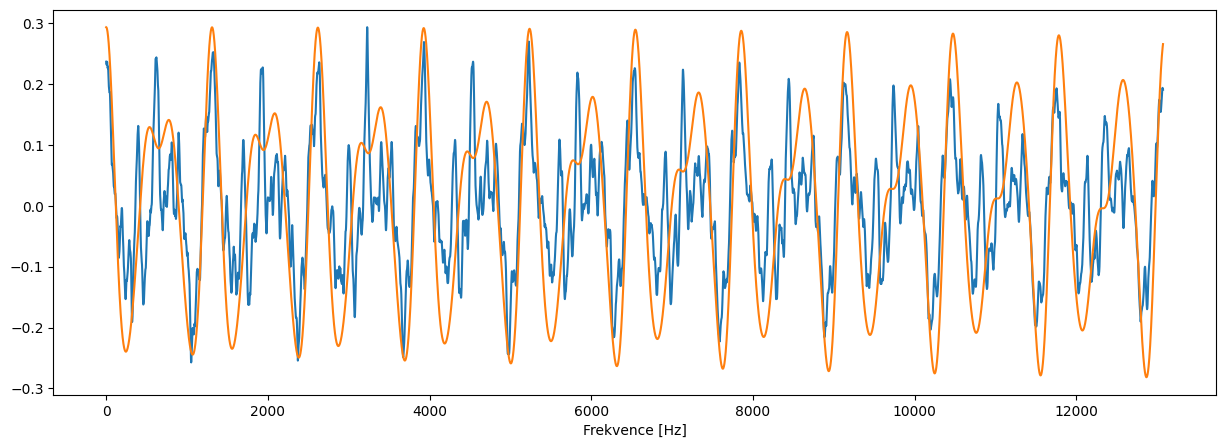

In [12]:
#ukol 4.5 pro 26
# >>>>>>>>>>>>>>>>> #dtft <<<<<<<<<<<<<<<<<<<<<<<<<
X = np.fft.fft(xall[26])
FREQRANGE = 10
FREQPOINTS = 200
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs

# finding the max and showing where we'll compute ... 
fmax = f[np.argmax(Xmag)]
Xmax = np.max(Xmag)
ffrom = fmax-FREQRANGE
fto = fmax+FREQRANGE
fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

prechodna = fmax
ton26 = np.zeros(N)


for i in np.arange(1,6):
    fmax = prechodna * i
      
    ffrom = fmax-FREQRANGE
    fto = fmax+FREQRANGE
    fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

    # do the DTFT 
    A = np.zeros([FREQPOINTS, N],dtype=complex)   
    for k in np.arange(0,FREQPOINTS):
      A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
    Xdtft = np.matmul(A,xall[26].T)
    
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    precisefmax = precisefmax//2
    index = int(precisefmax)
    # zkusit Xdtft nebo precisefmax
    ton26[index] = Xdtft[index]

perioda1_2 = int(0.02724053*Fs*10)

ton26_0 = np.fft.ifft(ton26, n=Fs)
ton26_0 = np.real(ton26_0/max(ton26_0)*max(xall[26]))
sf.write("../a.wav", ton26_0, Fs)
plt.figure(figsize=(15,5))
plt.plot(xall[26][:perioda1_2])
plt.plot(ton26_0[N:perioda1_2+N]) 
plt.xlabel("Frekvence [Hz]")


/tmp/ipykernel_2823/2236565542.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  ton51[index] = Xdtft[index]


Text(0.5, 0, 'Frekvence [Hz]')

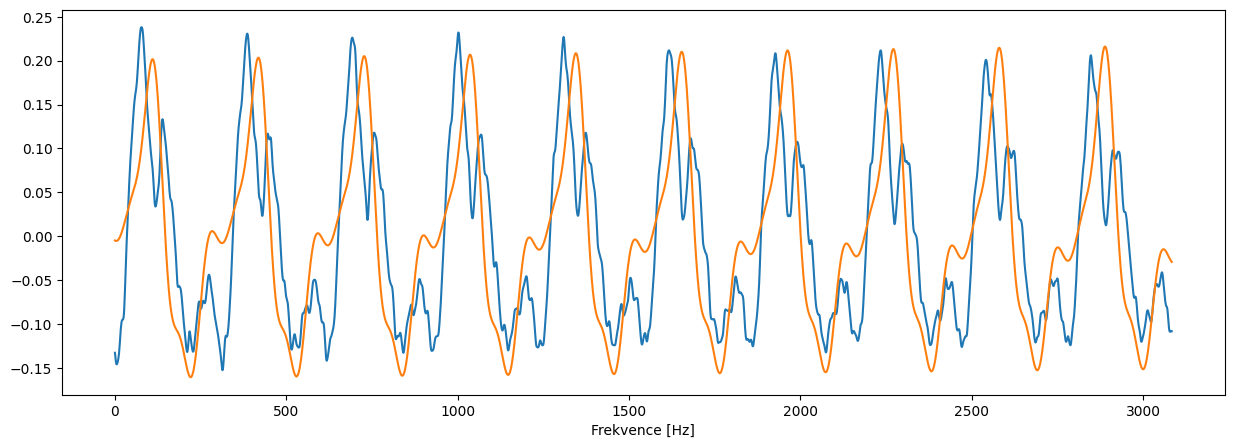

In [13]:
#ukol 4.5 pro 51
# >>>>>>>>>>>>>>>>> #dtft <<<<<<<<<<<<<<<<<<<<<<<<<
X = np.fft.fft(xall[51])
FREQRANGE = 10
FREQPOINTS = 1000
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs

# finding the max and showing where we'll compute ... 
fmax = f[np.argmax(Xmag)]
Xmax = np.max(Xmag)
ffrom = fmax-FREQRANGE
fto = fmax+FREQRANGE
fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

prechodna = fmax
ton51 = np.zeros(N)


for i in np.arange(1,6):
    fmax = prechodna * i
      
    ffrom = fmax-FREQRANGE
    fto = fmax+FREQRANGE
    fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

    # do the DTFT 
    A = np.zeros([FREQPOINTS, N],dtype=complex)   
    for k in np.arange(0,FREQPOINTS):
      A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
    Xdtft = np.matmul(A,xall[51].T)
    
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    index = int(precisefmax)
    ton51[index] = Xdtft[index]

perioda2_2 = int(0.00642839*Fs*10)

ton51_0 = np.fft.ifft(ton51, n=Fs)
ton51_0 = np.real(ton51_0/max(ton51_0)*(max(xall[51])))
sf.write("../b.wav", ton51_0, Fs)
plt.figure(figsize=(15,5))
plt.plot(xall[51][:perioda2_2])
plt.plot(ton51_0[12000:perioda2_2+12000]) 
plt.xlabel("Frekvence [Hz]")


In [1]:
#ukol 4.5 pro 104
# >>>>>>>>>>>>>>>>> #dtft <<<<<<<<<<<<<<<<<<<<<<<<<
X = np.fft.fft(xall[104])
FREQRANGE = 10
FREQPOINTS = 16650
kall = np.arange(0,int(N/2) +1)
Xmag = np.abs(X[kall])
Xphase = np.angle(X[kall])
f = kall / N * Fs

# finding the max and showing where we'll compute ... 
fmax = f[np.argmax(Xmag)]
Xmax = np.max(Xmag)
ffrom = fmax-FREQRANGE
fto = fmax+FREQRANGE
fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)
n = np.arange(0, N)
prechodna = fmax
ton104 = np.zeros(N)


for i in np.arange(1,6):
    fmax = prechodna * i
      
    ffrom = fmax-FREQRANGE
    fto = fmax+FREQRANGE
    fsweep = np.linspace(fmax-FREQRANGE, fmax+FREQRANGE,FREQPOINTS)

    # do the DTFT 
    A = np.zeros([FREQPOINTS, N],dtype=complex)   
    for k in np.arange(0,FREQPOINTS):
      A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
    Xdtft = np.matmul(A,xall[104].T)

    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    index = int(precisefmax)
    ton104[index] = Xdtft[index]

perioda3_2 = int(0.00030098*Fs*10)

ton104_0 = np.fft.ifft(ton104, n=Fs)
ton104_0 = np.real((ton104_0)/max(ton104_0)*max(xall[104]))
sf.write("../c.wav", ton104_0, Fs)
plt.figure(figsize=(15,5))
plt.plot(xall[104][:perioda3_2])
plt.plot(ton104_0[:perioda3_2]) 
plt.xlabel("Frekvence [Hz]")


NameError: name 'np' is not defined